In [1]:
import pandas as pd

# Load the CSV file

df = pd.read_csv("spotify_tracks.csv")

# Show basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6300 non-null   object
 1   name         6300 non-null   object
 2   genre        6300 non-null   object
 3   artists      6300 non-null   object
 4   album        6300 non-null   object
 5   popularity   6300 non-null   int64 
 6   duration_ms  6300 non-null   int64 
 7   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 350.8+ KB


(None,
                        id                                           name  \
 0  7kr3xZk4yb3YSZ4VFtg2Qt                                       Acoustic   
 1  1kJygfS4eoVziBBI93MSYp                                       Acoustic   
 2  6lynns69p4zTCRxmmiSY1x                  Here Comes the Sun - Acoustic   
 3  1RC9slv335IfLce5vt9KTW                                    Acoustic #3   
 4  5o9L8xBuILoVjLECSBi7Vo  My Love Mine All Mine - Acoustic Instrumental   
 
       genre                        artists  \
 0  acoustic                  Billy Raffoul   
 1  acoustic                  Billy Raffoul   
 2  acoustic  Molly Hocking, Bailey Rushlow   
 3  acoustic              The Goo Goo Dolls   
 4  acoustic  Guus Dielissen, Casper Esmann   
 
                                            album  popularity  duration_ms  \
 0                                           1975          58       172199   
 1                        A Few More Hours at YYZ          57       172202   
 2         

In [2]:
# Step 1: Data Cleaning

# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicate_count = df.duplicated().sum()

# Convert duration from milliseconds to minutes
df["duration_min"] = df["duration_ms"] / 60000

missing_values, duplicate_count, df[["duration_ms", "duration_min"]].head()


(id             0
 name           0
 genre          0
 artists        0
 album          0
 popularity     0
 duration_ms    0
 explicit       0
 dtype: int64,
 np.int64(0),
    duration_ms  duration_min
 0       172199      2.869983
 1       172202      2.870033
 2       144786      2.413100
 3       116573      1.942883
 4       133922      2.232033)

C:\Users\hp\AppData\Local\Temp\ipykernel_1096\3205656883.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


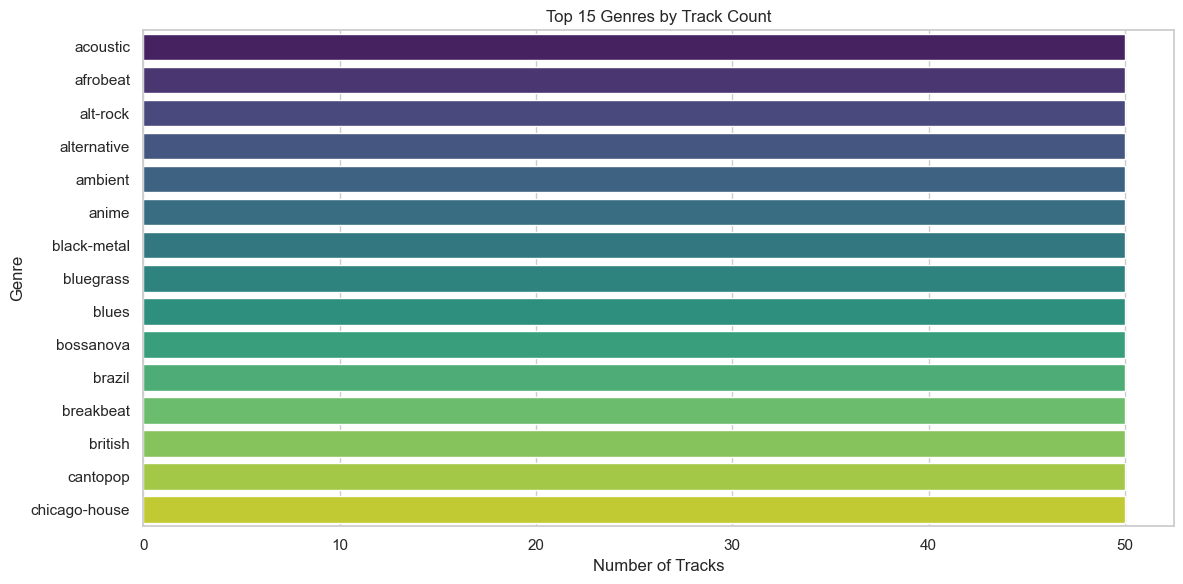

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Count of tracks by genre (top 15)
top_genres = df['genre'].value_counts().head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 15 Genres by Track Count")
plt.xlabel("Number of Tracks")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


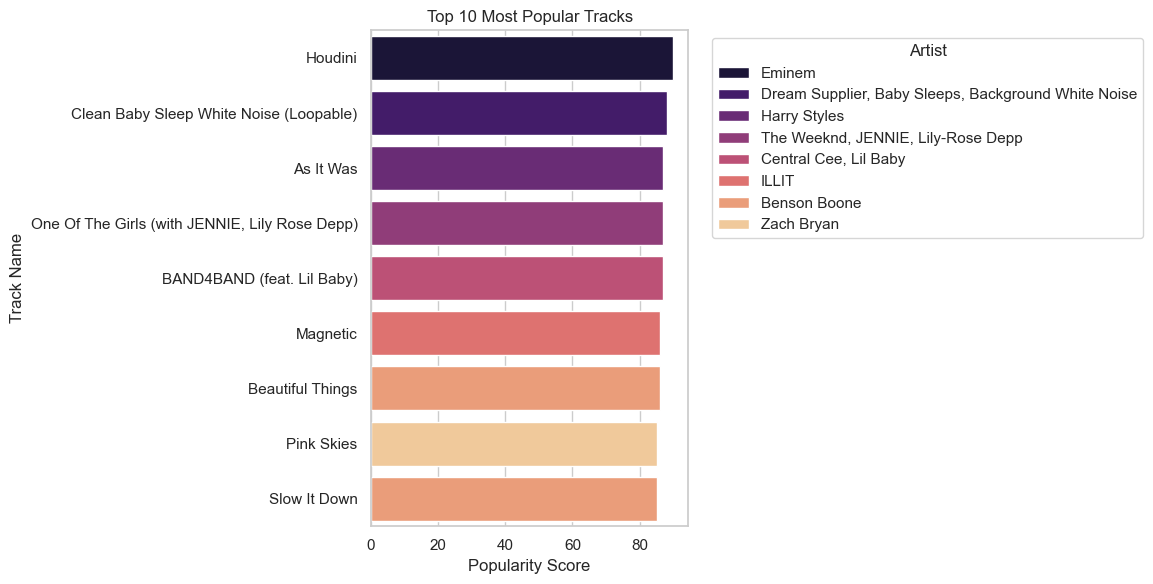

In [4]:
# Top 10 most popular tracks
top_tracks = df.sort_values(by="popularity", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="popularity", y="name", data=top_tracks, hue="artists", dodge=False, palette="magma")
plt.title("Top 10 Most Popular Tracks")
plt.xlabel("Popularity Score")
plt.ylabel("Track Name")
plt.legend(title="Artist", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


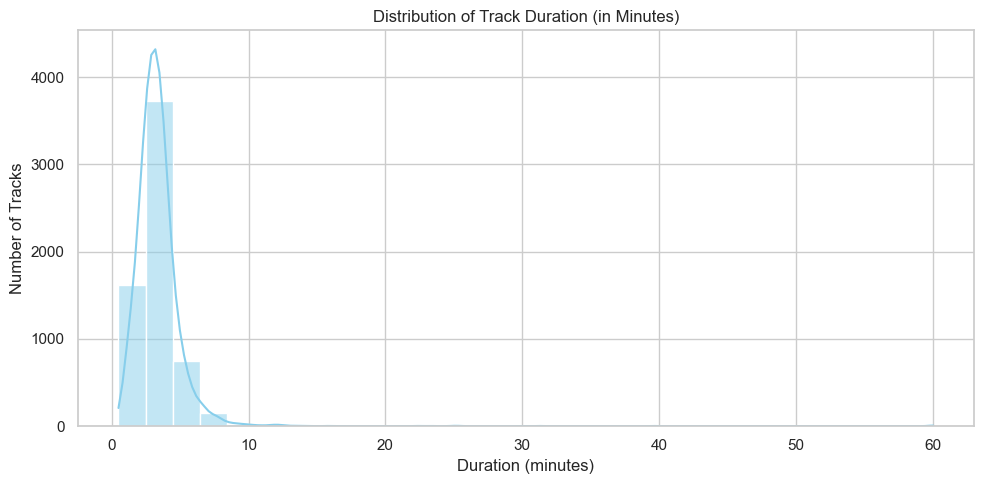

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df['duration_ms'] / 60000, bins=30, kde=True, color='skyblue')
plt.title("Distribution of Track Duration (in Minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Tracks")
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_1096\2374545700.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette="coolwarm")


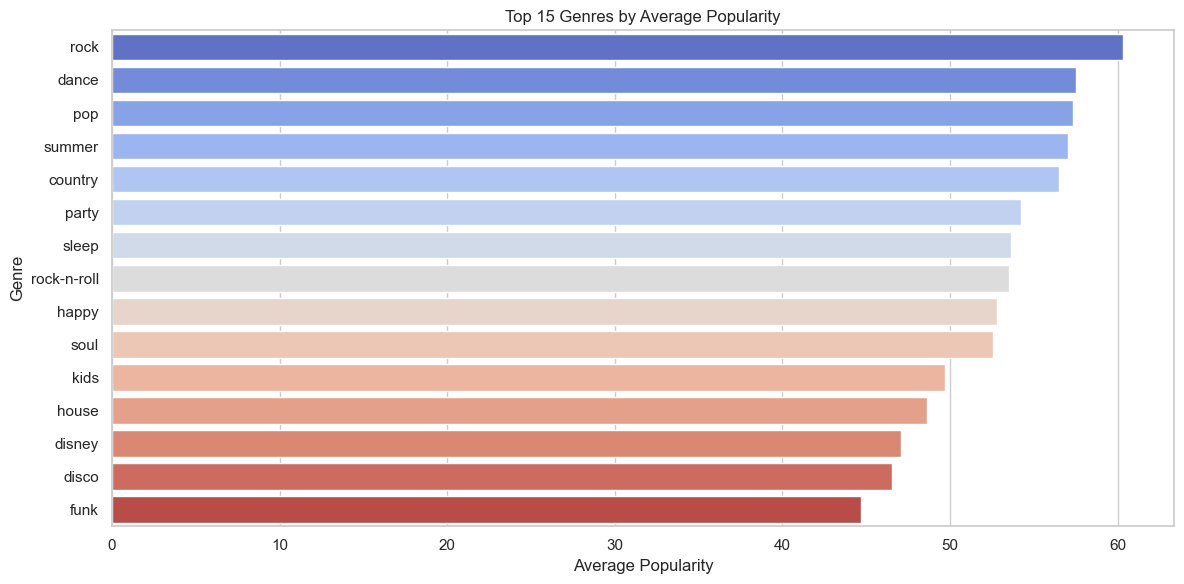

In [6]:
# Calculate average popularity by genre
genre_popularity = df.groupby("genre")["popularity"].mean().sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette="coolwarm")
plt.title("Top 15 Genres by Average Popularity")
plt.xlabel("Average Popularity")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()
